In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import keras
import tensorflow as tf

Using TensorFlow backend.


In [2]:
train_dataset=pd.read_csv("Goldman_sachs_stocks.csv")

In [3]:
train=train_dataset.iloc[:,1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
sc=MinMaxScaler(feature_range=(0,1))
train_scaled=sc.fit_transform(train)

In [6]:
x_train=[]
y_train=[]
for i in range(50,1258):
    x_train.append(train_scaled[i-50:i,0])
    y_train.append(train_scaled[i])


In [7]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [8]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [9]:
x_train.shape

(1208, 50, 1)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
rnn_model1=Sequential()

In [18]:
rnn_model1.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
rnn_model1.add(Dropout(0.2))

In [20]:
rnn_model1.add(LSTM(units=50,return_sequences=True))
rnn_model1.add(Dropout(0.2))

rnn_model1.add(LSTM(units=50,return_sequences=True))
rnn_model1.add(Dropout(0.2))

rnn_model1.add(LSTM(units=50))
rnn_model1.add(Dropout(0.2))

In [21]:
rnn_model1.add(Dense(units=1))

In [22]:
rnn_model1.compile(optimizer="adam",
                  loss="mean_squared_error")


In [24]:
rnn_model1.fit(x=x_train,y=y_train,epochs=100,batch_size=40)

Epoch 1/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 2/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0035
Epoch 3/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0036
Epoch 4/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0029
Epoch 5/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0027
Epoch 6/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0027
Epoch 7/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0029
Epoch 8/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 9/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0031
Epoch 10/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0030
Epoch 11/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0027
Epoch 12/100
1208/1208 [==============================] - 6s 5ms/step - lo

1208/1208 [==============================] - 6s 5ms/step - loss: 0.0011
Epoch 96/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0011A: 2s -
Epoch 97/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0011
Epoch 98/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0010
Epoch 99/100
1208/1208 [==============================] - 6s 5ms/step - loss: 0.0011
Epoch 100/100
1208/1208 [==============================] - 6s 5ms/step - loss: 9.8571e-04


In [25]:
test_dataset=pd.read_csv("Goldman_sachs_stocks_test.csv")

In [26]:
test=test_dataset.iloc[:,1:2].values

In [34]:
total_data=pd.concat((train_dataset["Open"],test_dataset["Open"]),axis=0)

In [43]:
inputs=total_data[len(total_data)-len(test)-50:].values
inputs=inputs.reshape(-1,1)
inputs=sc.fit_transform(inputs)

In [55]:
x_test=[]
for i in range(50,len(test)):
    x_test.append(inputs[i-50:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock=rnn_model1.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock)

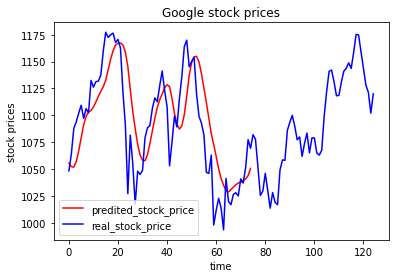

In [56]:
plt.plot(predicted_stock_price,color="red",label="predited_stock_price")
plt.plot(test,color="blue",label="real_stock_price")
plt.title("Goldman stock prices")
plt.xlabel("time")
plt.ylabel("stock prices")
plt.legend()
plt.show()